In [1]:
%run Function_set_dic.ipynb
import networkx as nx
import numpy as np
from collections import defaultdict
import random
from numpy import random
import matplotlib.pyplot as plt

In [2]:
from collections import defaultdict

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import networkx as nx
import numpy as np
import dwave.inspector
import dimod
from dwave.system import LeapHybridSampler
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

In [32]:
def final_result(QUBO_matrix,result):
    return np.sum(np.diag(QUBO_matrix)*result)

In [3]:
network,pos = Make_Question(4,4,Density = 0.7, option = "1-norm", distance = 2)

print(network)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]]


{(1, 0): '0', (2, 0): '1', (3, 0): '2', (4, 0): '3', (5, 0): '4', (6, 0): '5', (7, 0): '6', (8, 0): '7', (9, 0): '8', (10, 0): '9', (11, 0): '10', (1, 3): '11', (2, 3): '12', (2, 6): '13', (3, 4): '16', (3, 7): '17', (4, 5): '19', (4, 8): '20', (5, 9): '22', (6, 7): '24', (7, 8): '27', (7, 10): '28', (8, 9): '31', (8, 11): '32', (10, 11): '36', (3, 1): '14', (3, 2): '15', (4, 3): '18', (5, 4): '21', (6, 2): '23', (7, 3): '25', (7, 6): '26', (8, 4): '29', (8, 7): '30', (9, 5): '33', (9, 8): '34', (10, 7): '35', (11, 8): '37', (11, 10): '38'}


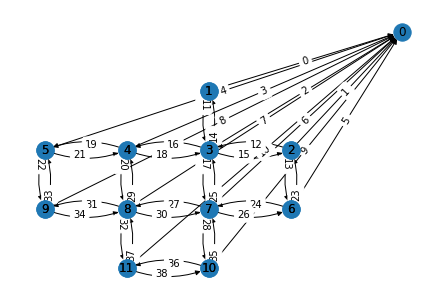

In [4]:
G, compelete_label, graph = complete_Graph(network,pos)
print(compelete_label)

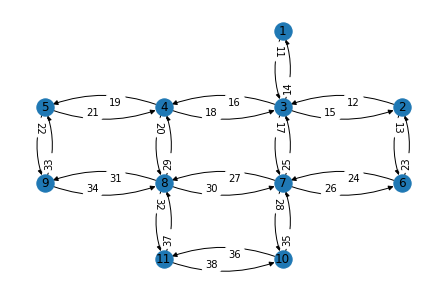

In [5]:
G_prime, sub_edge_label, sub_graph = sub_Graph (network,pos)

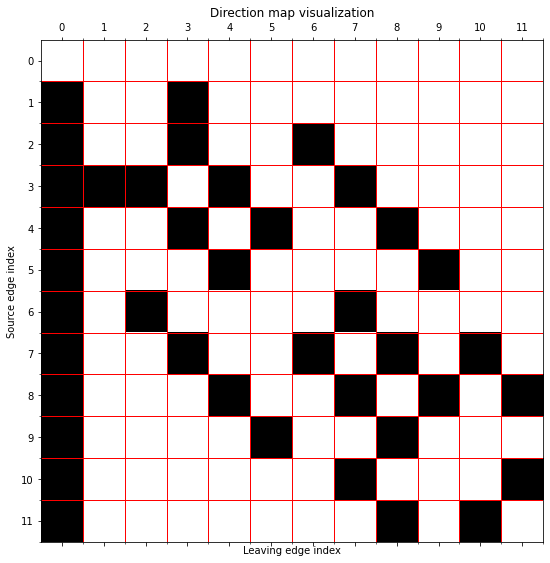

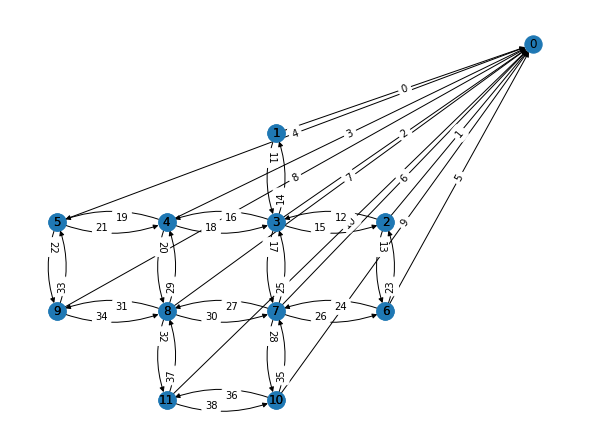

In [21]:
#matfig = plt.figure(figsize=(Final_map.shape[0],Final_map.shape[1]))
matfig = plt.figure(figsize=(9,9))
plt.matshow(network,cmap=plt.cm.binary,fignum=matfig.number)
ax = plt.gca()
#plt.matshow(Final_map,cmap=plt.cm.binary)
plt.xlabel('Leaving edge index')
plt.ylabel('Source edge index')
plt.title ("Direction map visualization")

# Major ticks
ax.set_xticks(np.arange(0, network.shape[0], step=1))
ax.set_yticks(np.arange(0, network.shape[0], step=1))

# Labels for major ticks
ax.set_xticklabels(np.arange(0, network.shape[0], step=1))
ax.set_yticklabels(np.arange(0, network.shape[0], step=1))

# Minor ticks
ax.set_xticks(np.arange(0.5, network.shape[0]+0.5, step=1), minor=True)
ax.set_yticks(np.arange(0.5, network.shape[0]+0.5, step=1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='r', linestyle='-', linewidth=1)

plt.show()


plt.figure(2,figsize=(8,6)) 
_, _, _ = complete_Graph(network,pos)

In [22]:
# How many panel ---> Max electricity level wire could reach 
Q = len(pos)-1

print(Q)

# How many edges
edge_number = len(compelete_label)

# make dictionary
edge_dictionary,Total = make_dictionary(edge_number, Q)

# basic_cost shape => (1,number_of_edge)
# such as : basic_cost = np.vstack(np.ones(number_of_edge))
basic_cost = np.ones(edge_number)

# flow cost (p)
flow_cost = np.ones(edge_number)


# initialize a QUBO matrix needed
QUBO_matrix_initial = np.zeros((edge_number*Q,edge_number*Q))


11


In [43]:
%run Function_set_dic.ipynb

QUBO_Obj = Objective(Q, edge_number, edge_dictionary, QUBO_matrix_initial, basic_cost,flow_cost)

penal = 5e1

print("penalty=" , penal)

penalty= 50.0


In [70]:
%run Function_set_dic.ipynb
QUBO_Constraint_1 = Constraint_1(network, Q, edge_number, edge_dictionary, compelete_label, QUBO_matrix_initial, penalty = penal*12)

QUBO_Constraint_2 = Constraint_2(network, Q, edge_number, edge_dictionary, compelete_label, QUBO_matrix_initial, penalty = penal*4)

QUBO_Constraint_add = Constraint_add(network, Q, edge_number, compelete_label, edge_dictionary, QUBO_matrix_initial, penalty = penal*40 )   

QUBO_matrix = QUBO_Obj + QUBO_Constraint_1 + QUBO_Constraint_2  + QUBO_Constraint_add


QUBO = QUBO_matrix

width,height = np.shape(QUBO)

QUBO_dictionary = defaultdict(int)
for i in range(width):
    for j in range(height):
        QUBO_dictionary[(i,j)] = QUBO[i,j]
        

# Select a solver
sampler = LeapHybridSampler()

sampleset = sampler.sample_qubo(QUBO)


0
11
[0 3] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131]
1
12
13
[0 3 6] [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153]
2
14
15
16
17
[0 1 2 4 7] [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197]
3
18
19
20
[0 3 5 8] [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230]
4
21
22
[0 4 9] [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252]
5
23
24
[0 2 7] [55, 56, 57, 58, 59

[ 11  33  44  84 121 188 264 300 374 396 408]
[ 11  33  44  84 121 188 264 300 374 396 408]
[ 1  3  4  7 11 17 24 27 34 36 37]
[0 0 0 7 0 1 0 3 0 0 1]
widths [1, 1, 2, 1, 1, 1, 4, 8, 1, 1, 2]


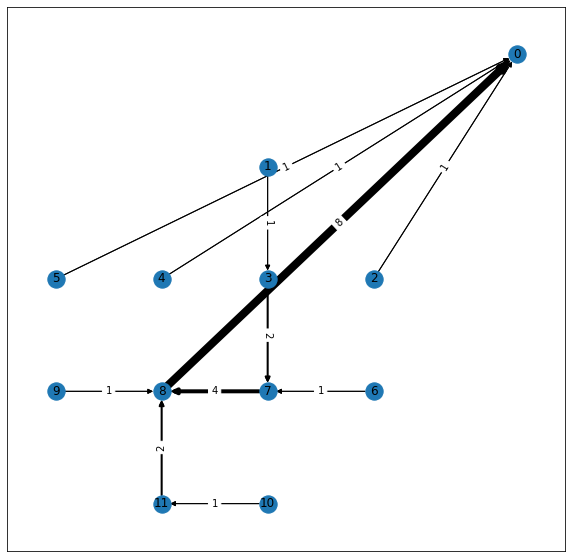

In [61]:
OP = sampleset.to_pandas_dataframe()


OP = OP.sort_values("energy")
OP_final = OP.to_numpy()

rank = 0

OP_opt = OP_final[rank,:].flatten()
sample = OP_opt.astype(int)

sampleset.info['qpu_access_time']

location = np.where(OP_opt[:-2])[0]
print(location)
Q = len(pos)-1  
number_of_edge = len(compelete_label)

final_index = location[location < edge_number * Q ]
print(final_index)


final_G = nx.DiGraph()
final_G = nx.from_numpy_array(np.zeros_like(network),create_using=nx.DiGraph(directed=True))

print(str(final_index // Q))
print(str(final_index % Q))

for value in final_index:
    #print(str(value//Q))
    final_G.add_weighted_edges_from([(*edge, value % Q + 1) for edge, label in compelete_label.items() if label == str(value//Q)])
    
matfig = plt.figure(figsize=(10,10)) 
labels = nx.get_edge_attributes(final_G,'weight')
widths = list(nx.get_edge_attributes(final_G,'weight').values())
print("widths",widths)
nx.draw_networkx(final_G, pos)
nx.draw_networkx_edge_labels(final_G,pos,edge_labels = labels)
nx.draw_networkx_edges(final_G,pos,width = widths)


{'qpu_access_time': 0, 'charge_time': 2989500, 'run_time': 2989500, 'problem_id': '09034604-b953-4d4c-8e1a-1672ea3d8403'}
最终结果 18.0


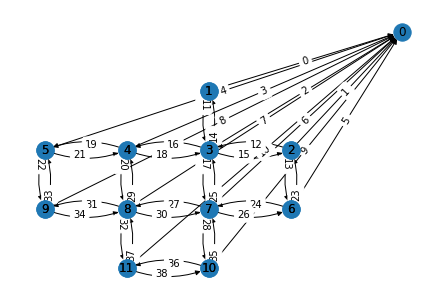

Now, checking Contraint 1
Constraint 1 is  True  ===> Constraint 1 is Done.
 
Now, checking Contraint 2
Constraint 2 is  True  ===> Constraint 2 is Done.
 


In [62]:
#print(sampleset.info['qpu_access_time']*10**(-6))
print(sampleset.info)

G, compelete_label, graph = complete_Graph(network,pos)

Final_answer = sample[:edge_number*Q]

#print((np.diag(QUBO_Obj)),(Final_answer))
print("最终结果",final_result(QUBO_Obj,Final_answer))

%run Function_set_dic.ipynb
check_1(Final_answer, network, Q, edge_number, edge_dictionary)
check_2(Final_answer, network, Q, edge_number, edge_dictionary)
#check_3(Final_answer, network, Q, edge_number, edge_dictionary, m_t_u, m_t_l)

In [133]:
QUBO_matrix = QUBO_Obj + 1.1*QUBO_Constraint_1 + 2*QUBO_Constraint_2  + 1.3*QUBO_Constraint_add

In [134]:
%run Function_set_dic.ipynb
m_t_u,m_t_l = capacity_subtree_limit_generator(pos,Q)

m_t_u[:] = 0
m_t_l[:] = 0
m_t_u[2:] = 3
m_t_l[2:] = 0

print('m_t_l = ', m_t_l)

m_t_u = np.where(m_t_u < m_t_l, m_t_l, m_t_u)

print('m_t_u = ', m_t_u)


#QUBO_matrix_copy = QUBO_matrix

QUBO_matrix, QUBO_C3_p1, edge_dictionary_C31 = Constraint_3_part_1(network, m_t_u, Q, edge_number, edge_dictionary, QUBO_matrix, penalty = penal)

QUBO_matrix, QUBO_C3_p2, edge_dictionary_C32 = Constraint_3_part_2(network, m_t_l, Q, edge_number, edge_dictionary_C31, QUBO_matrix, penalty = penal)

# Bus edge Ban map( Q ** 2)  可以通过就是 1 不可以就是 0
Ban_map_Bus = np.ones( Q**2 )

#Final_QUBO_matrix, QUBO_Constraint_4 = Constraint_4(QUBO_matrix, Q, Ban_map_Bus ,penalty = 1e2)

m_t_l =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
m_t_u =  [0. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


[ 47  59 112 121 143 176 187 210 288 352 363 385 429 430 431 432 433 434
 436 438 439 440 441 442 444 446 447 448 451 452 453 455 457 459 460 464
 467 468 472 477 480 484 487]
[ 47  59 112 121 143 176 187 210 288 352 363 385]
[ 4  5 10 11 13 16 17 19 26 32 33 35]
[3 4 2 0 0 0 0 1 2 0 0 0]
widths [1, 1, 1, 1, 2, 4, 5, 3, 1, 1, 1, 3]


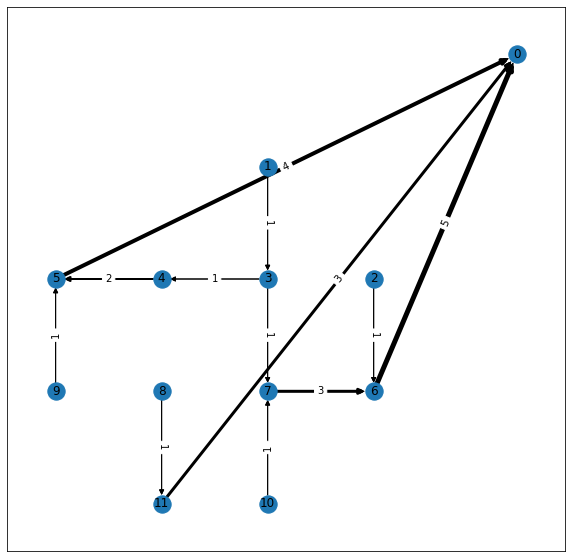

In [135]:
QUBO = QUBO_matrix
#QUBO = Final_QUBO_matrix
#QUBO = QUBO_Obj + QUBO_Constraint_1 + QUBO_Constraint_2 + QUBO_Constraint_add

width,height = np.shape(QUBO)

QUBO_dictionary = defaultdict(int)
for i in range(width):
    for j in range(height):
        QUBO_dictionary[(i,j)] = QUBO[i,j]
        

# Select a solver
sampler = LeapHybridSampler()

sampleset = sampler.sample_qubo(QUBO)



OP = sampleset.to_pandas_dataframe()


OP = OP.sort_values("energy")
OP_final = OP.to_numpy()

rank = 0

OP_opt = OP_final[rank,:].flatten()
sample = OP_opt.astype(int)

sampleset.info['qpu_access_time']

location = np.where(OP_opt[:-2])[0]
print(location)
Q = len(pos)-1  
number_of_edge = len(compelete_label)

final_index = location[location < edge_number * Q ]
print(final_index)


final_G = nx.DiGraph()
final_G = nx.from_numpy_array(np.zeros_like(network),create_using=nx.DiGraph(directed=True))

print(str(final_index // Q))
print(str(final_index % Q))

for value in final_index:
    #print(str(value//Q))
    final_G.add_weighted_edges_from([(*edge, value % Q + 1) for edge, label in compelete_label.items() if label == str(value//Q)])
    
matfig = plt.figure(figsize=(10,10)) 
labels = nx.get_edge_attributes(final_G,'weight')
widths = list(nx.get_edge_attributes(final_G,'weight').values())
print("widths",widths)
nx.draw_networkx(final_G, pos)
nx.draw_networkx_edge_labels(final_G,pos,edge_labels = labels)
nx.draw_networkx_edges(final_G,pos,width = widths)

0.0
{'qpu_access_time': 0, 'charge_time': 2986111, 'run_time': 2986111, 'problem_id': 'a3bb81ec-c784-46f9-a282-8d72f9a6fcb0'}


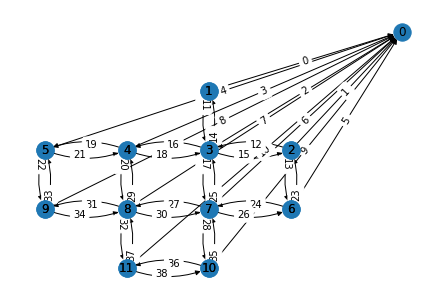

Now, checking Contraint 1
Constraint 1 is  False  ===> Constraint 1 is Done.
 
Now, checking Contraint 2
Constraint 2 is  False  ===> Constraint 2 is Done.
 
Now, checking Contraint 3
Constraint 3 is  True  ===> Constraint 3 is Done.
 


In [136]:
print(sampleset.info['qpu_access_time']*10**(-6))
print(sampleset.info)

G, compelete_label, graph = complete_Graph(network,pos)

Final_answer = sample[:edge_number*Q]

%run Function_set_dic.ipynb
check_1(Final_answer, network, Q, edge_number, edge_dictionary)
check_2(Final_answer, network, Q, edge_number, edge_dictionary)
check_3(Final_answer, network, Q, edge_number, edge_dictionary, m_t_u, m_t_l)